# **Question No.2. NLP Dataset: Sentiment Analysis dataset**

**Assignment Group : 054**

Sankara Kiran Katta (2019AH04113)

Murali Mohan Mothupally (2019AH04110)

Udaya Kumar Uddavolu (2019AH04029)

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow-datasets

# 1. Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import copy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.12.0
GPU is available


# Data Visualization

## Download Data
The data set is downloaded using tensorflow_datasets library using dataset name Sentiment140

While downloading the data is devided into train, test and validation sets.

In [ ]:
(train_data, validation_data, test_data), info = tfds.load('Sentiment140', with_info=True, as_supervised=True,
split=['train+test[:95%]','train+test[95%:99%]', 'train+test[99%:]'])

## Visualize Data

### a. Print at least two movie reviews from each class of the dataset, for a sanity check that labels match the text.

In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(160000)))

In [ ]:
test_examples_batch, test_labels_batch = next(iter(test_data.batch(16000)))

In [ ]:
positiveRatedArr = np.where(train_labels_batch == 4)
negativeRatedArr = np.where(train_labels_batch == 0)
print('Text for label = 4 :')
print('---------------------')
for i in range(3):
  print('Text : {}'.format(train_examples_batch[positiveRatedArr[0][i]]))
print()
print('Text for label = 0 :')
print('---------------------')
for i in range(3):
  print('Label : {}'.format(train_examples_batch[negativeRatedArr[0][i]]))

Text for label = 4 :
---------------------
Text : b"i'm 10x cooler than all of you! "
Text : b'what a beautiful day not to got to my first class '
Text : b".@HildyGottlieb &amp; I was just saying to Maha'al yesterday, everything we ever needed to know was in Beatles' lyrics - you prove my point! "

Text for label = 0 :
---------------------
Label : b'O.kk? Thats weird I cant stop following people on twitter... I have tons of people to unfollow '
Label : b'kinda sad and confused  why do guys do this?'
Label : b'Working through hundreds of assignments '


### b. Plot a bar graph of class distribution in a dataset. Each bar depicts the number of tweets belonging to a particular sentiment. (recommended - matplotlib/seaborn libraries)


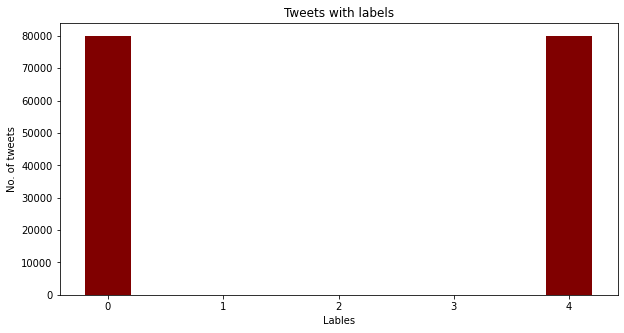

In [ ]:
cnt = [0, 4]
values = [negativeRatedArr[0].size, positiveRatedArr[0].size]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cnt, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Lables")
plt.ylabel("No. of tweets")
plt.title("Tweets with labels")
plt.show()

### d. Print the shapes of train and test data.

In [ ]:
train_size = len(train_examples_batch)*.99
test_size = len(train_examples_batch)*.01
print('Training dataset shape is {}'.format(train_size))
print('Test dataset shape is {}'.format(test_size))

Training dataset shape is 158400.0
Test dataset shape is 1600.0


# 3. Data Pre-processing 

### Using pre-embed layer https://tfhub.dev/google/nnlm-en-dim128/1

Bring the train and test data in the required format.


In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 0.74521875, -0.43058357, -0.10195638,  0.8269179 , -2.126677  ,
        -2.450484  , -1.3341991 , -0.19802694, -0.3232351 , -0.5855257 ,
        -0.08153006,  1.4178419 ,  0.7572757 ,  0.17072797, -0.996602  ,
         0.36943823, -0.04169073, -0.04259901, -0.3795016 , -1.3164685 ],
       [ 0.6192465 , -1.0948324 ,  1.0879468 ,  0.83306724, -1.806097  ,
        -2.3157938 , -1.2563314 ,  0.7989738 ,  1.0902125 ,  0.8513546 ,
        -1.2029169 ,  0.3322251 ,  0.33671325,  0.3521787 , -1.442887  ,
         0.35744092,  0.84385216, -0.99169934, -1.2549577 , -0.60273063],
       [ 0.16911778, -1.5183862 ,  0.9837622 ,  0.07942677, -1.4421005 ,
        -1.272273  , -1.0288479 ,  0.28634924,  1.0551064 ,  0.38677648,
        -2.0219698 ,  1.0348428 , -0.2797286 ,  0.2574708 , -2.3068857 ,
         0.6403578 ,  2.1930237 , -1.0755359 , -1.3789693 , -0.3213589 ]],
      dtype=float32)>

In [ ]:
# Normalizing the labels data
train_labels_batch = train_labels_batch//4
train_labels_batch

<tf.Tensor: shape=(160000,), dtype=int32, numpy=array([1, 0, 1, ..., 0, 1, 1], dtype=int32)>

# 4. Model Building

## Model is built as below
### a. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.

### b. Add L2 regularization to all the layers.

### c. Added dropout at layer 2 because that's giving optimum results with good accuracy.
### d. Have choosen ReLU for hidden and sigmoid for output as it's binary classed problem.

In [ ]:
# Let's now build the full model.
model = tf.keras.Sequential()
#Input layer
model.add(hub_layer)
#Layer 1
model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
#Layer 2
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))
#Layer 3
model.add(Dense(3, activation='relu', kernel_regularizer='l2'))
#Output Layer
model.add(Dense(1, activation='sigmoid'))

### e. Printing the model summary.

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                336       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 27        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 4         
Total params: 400,523
Trainable params: 400,523
Non-trainable params: 0
________________________________________________

# 5. Model Compilation

In [ ]:
# Loss function and optimizer.
opt = tf.keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
model.compile(optimizer = opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Model Training

### a. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [ ]:
# Train the model.
'''
positiveRatedArr = np.where(train_labels_batch == 4)
negativeRatedArr = np.where(train_labels_batch == 0)
print('Text : {}'.format(train_examples_batch[positiveRatedArr[0][i]]))
'''
history = model.fit(train_examples_batch, train_labels_batch, epochs = 16, batch_size = 128, validation_split = 0.1)

Epoch 1/16
1125/1125 [==============================] - 6s 5ms/step - loss: 0.6386 - accuracy: 0.6558 - val_loss: 0.5566 - val_accuracy: 0.7515
Epoch 2/16
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5619 - accuracy: 0.7036 - val_loss: 0.5248 - val_accuracy: 0.7515
Epoch 3/16
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5532 - accuracy: 0.7091 - val_loss: 0.5495 - val_accuracy: 0.7563
Epoch 4/16
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5514 - accuracy: 0.7581 - val_loss: 0.5586 - val_accuracy: 0.7537
Epoch 5/16
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5332 - accuracy: 0.7686 - val_loss: 0.6323 - val_accuracy: 0.7556
Epoch 6/16
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5386 - accuracy: 0.7797 - val_loss: 0.5642 - val_accuracy: 0.7523
Epoch 7/16
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5224 - accuracy: 0.7865 - val_loss: 0.5491 - val_accuracy:

### Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

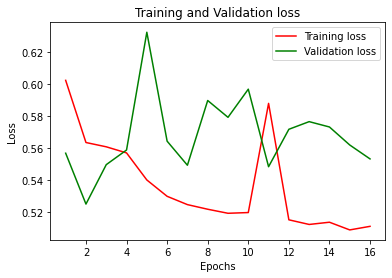

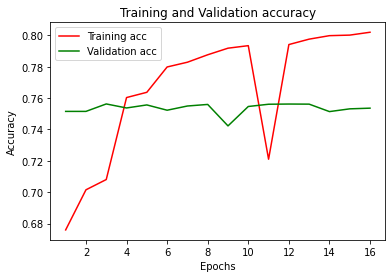

In [ ]:
# plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7. Model Evaluation

### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

### b. Print the two most incorrectly classified texts for each class in the test dataset.

### Confusion matrix and classification

In [ ]:
test_labels_batch = test_labels_batch//4

In [ ]:
# Evaluate the model
results = model.evaluate(test_examples_batch, test_labels_batch, verbose=0)
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.480
accuracy: 0.820


In [ ]:
Y_prediction = model.predict(test_examples_batch[:])
Y_prediction = np.round_(Y_prediction)

In [ ]:
# Classification Report

from sklearn.metrics import classification_report 

print(classification_report(test_labels_batch[:], Y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      7916
           1       0.84      0.79      0.82      8084

    accuracy                           0.82     16000
   macro avg       0.82      0.82      0.82     16000
weighted avg       0.82      0.82      0.82     16000



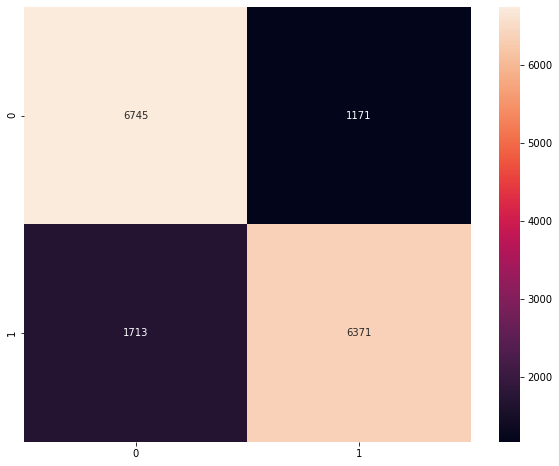

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels_batch, Y_prediction) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

# Hyperparameter Tuning

### 1. Changing Network Depth: 
Removing 3rd layer (code commented)

In [ ]:
# Let's now build the full model.
model2 = tf.keras.Sequential()
#Input layer
model2.add(hub_layer)
#Layer 1
model2.add(Dense(16, activation='relu', kernel_regularizer='l2'))
#Layer 2
model2.add(Dropout(0.25))
model2.add(Dense(8, activation='relu', kernel_regularizer='l2'))
#Layer 3
#model2.add(Dense(3, activation='relu', kernel_regularizer='l2'))
#Output Layer
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
# Loss function and optimizer.
opt = tf.keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
model2.compile(optimizer = opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model.
history = model2.fit(train_examples_batch, train_labels_batch, epochs = 10, batch_size = 128, validation_split = 0.1)

Epoch 1/10
1125/1125 [==============================] - 6s 5ms/step - loss: 0.7741 - accuracy: 0.7899 - val_loss: 0.5812 - val_accuracy: 0.7575
Epoch 2/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.4866 - accuracy: 0.8108 - val_loss: 0.5814 - val_accuracy: 0.7595
Epoch 3/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.4966 - accuracy: 0.8088 - val_loss: 0.5643 - val_accuracy: 0.7546
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.4985 - accuracy: 0.8115 - val_loss: 0.5952 - val_accuracy: 0.7564
Epoch 5/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5078 - accuracy: 0.8104 - val_loss: 0.5850 - val_accuracy: 0.7551
Epoch 6/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5048 - accuracy: 0.8105 - val_loss: 0.6342 - val_accuracy: 0.7509
Epoch 7/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5053 - accuracy: 0.8118 - val_loss: 0.5668 - val_accuracy:

### Model Evaluation

In [ ]:
# Evaluate the model
results = model2.evaluate(test_examples_batch, test_labels_batch, verbose=0)
for name, value in zip(model2.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.475
accuracy: 0.829


In [ ]:
Y_prediction = model2.predict(test_examples_batch[:])
Y_prediction = np.round_(Y_prediction)

In [ ]:
# Classification Report

from sklearn.metrics import classification_report 

print(classification_report(test_labels_batch[:], Y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7916
           1       0.84      0.82      0.83      8084

    accuracy                           0.83     16000
   macro avg       0.83      0.83      0.83     16000
weighted avg       0.83      0.83      0.83     16000



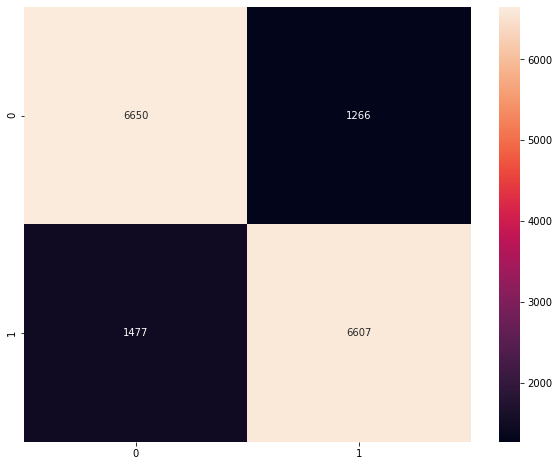

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels_batch, Y_prediction) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

### 2. Optimiser: 
Using RMSProp optimizer with L1 regularizer

In [ ]:
# Let's now build the full model.
model3 = tf.keras.Sequential()
#Input layer
model3.add(hub_layer)
#Layer 1
model3.add(Dense(16, activation='relu', kernel_regularizer='l1'))
#Layer 2
model3.add(Dropout(0.25))
model3.add(Dense(8, activation='relu', kernel_regularizer='l1'))
#Layer 3
model3.add(Dense(3, activation='relu', kernel_regularizer='l1'))
#Output Layer
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
# Loss function and optimizer.
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')
model3.compile(optimizer = opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model.
history = model3.fit(train_examples_batch, train_labels_batch, epochs = 16, batch_size = 128, validation_split = 0.1)

Epoch 1/16
1125/1125 [==============================] - 5s 5ms/step - loss: 1.4790 - accuracy: 0.7660 - val_loss: 1.1179 - val_accuracy: 0.7540
Epoch 2/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.9667 - accuracy: 0.8167 - val_loss: 0.8012 - val_accuracy: 0.7561
Epoch 3/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.6831 - accuracy: 0.8216 - val_loss: 0.6373 - val_accuracy: 0.7561
Epoch 4/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.5550 - accuracy: 0.8234 - val_loss: 0.5945 - val_accuracy: 0.7571
Epoch 5/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.5185 - accuracy: 0.8257 - val_loss: 0.5793 - val_accuracy: 0.7555
Epoch 6/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.5040 - accuracy: 0.8255 - val_loss: 0.5735 - val_accuracy: 0.7558
Epoch 7/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.4939 - accuracy: 0.8248 - val_loss: 0.5690 - val_accuracy:

In [ ]:
# Evaluate the model
results = model3.evaluate(test_examples_batch, test_labels_batch, verbose=0)
for name, value in zip(model3.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.465
accuracy: 0.831


In [ ]:
Y_prediction = model3.predict(test_examples_batch[:])
Y_prediction = np.round_(Y_prediction)

In [ ]:
# Classification Report

from sklearn.metrics import classification_report 

print(classification_report(test_labels_batch[:], Y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7916
           1       0.84      0.82      0.83      8084

    accuracy                           0.83     16000
   macro avg       0.83      0.83      0.83     16000
weighted avg       0.83      0.83      0.83     16000



# optimiztion increases accuracy.